<a href="https://colab.research.google.com/github/cacordobae/Inicios/blob/main/Analisis_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Análisis exploratorio de ventas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Se desea describir a profundidad el comportamiento detallado de la base de datos.
Base de ventas: Comprende información sobre clientes que ya han sido gestionado
en otros ciclos campañales.
Las variables en la base de datos son:

 Numero de documento: identificación del cliente
 Salario: Salario mensual reportado por el cliente en última actualización.
 Ciudad: Ciudad del cliente
 Fecha de nacimiento: Fecha de nacimiento del cliente.
 Productos adquiridos: Define la cantidad de productos adquiridos
 Cantidad de productos Actuales: Cantidad de productos actuales.
 Tiene hijos: Variable dicótoma que define 1 si tiene hijos o 0 si no tiene hijos.
 Id producto: Graba el producto de uso mayor consumo para el cliente.
 Venta: Variable dicótoma Define 1 si es venta o 0 si no es venta
 telefono_fijo y telefono_celular: teléfonos de contacto del cliente.

In [ ]:
ventas = pd.read_csv("/content/base_ventas.csv" ,delimiter=";" , encoding='latin-1')
print(ventas.head(10))

   numero_documento      salario                      ciudad     genero  \
0       53568925215  $ 8.340.888            Puerto Leguízamo  Masculino   
1       42389453003  $ 5.364.789  San Sebastián de Mariquita  Masculino   
2       65592068857  $ 1.652.091                     Córdoba   Femenino   
3       34621413223  $ 2.510.470      Santa Bárbara de Pinto   Femenino   
4       97222106368  $ 5.860.116                      Sácama  Masculino   
5       87430560256  $ 1.600.068                       Neiva  Masculino   
6       12286423243  $ 5.215.935                    El Retén   Femenino   
7       43536537120  $ 6.603.364                       Albán  Masculino   
8       56851153025  $ 8.695.611                     Córdoba   Femenino   
9       14103585497  $ 8.065.695                   El Dorado  Masculino   

  fecha_nacimiento  telefono_fijo  telefono_celular  productos_adquiridos  \
0       24/05/1980      264233357        3826820159                     0   
1       30/08/1950  

In [ ]:
#visualizar el tamaño del dataset
ventas.shape

(100000, 12)

In [ ]:
#renombrar la columna 'id_producto adquirido' por 'id_producto' para tratamientos de bases más adelante
ventas.rename(columns={'id_producto_adquirido': 'id_producto'}, inplace=True)
print(ventas.head())

   numero_documento      salario                      ciudad     genero  \
0       53568925215  $ 8.340.888            Puerto Leguízamo  Masculino   
1       42389453003  $ 5.364.789  San Sebastián de Mariquita  Masculino   
2       65592068857  $ 1.652.091                     Córdoba   Femenino   
3       34621413223  $ 2.510.470      Santa Bárbara de Pinto   Femenino   
4       97222106368  $ 5.860.116                      Sácama  Masculino   

  fecha_nacimiento  telefono_fijo  telefono_celular  productos_adquiridos  \
0       24/05/1980      264233357        3826820159                     0   
1       30/08/1950      228295387        3214217444                     0   
2       19/03/1991      271937254        3150913071                     9   
3       14/08/1953      263509713        3641974249                     0   
4       25/03/1978      224964892        3949083122                     3   

   cantidad_producto_actuales  tiene_hijos  id_producto  venta  
0                    

Chequeo de unicidad para las variables 'numero_documento', 'id_producto'

In [ ]:
#variable 'numero_documento'
duplicados= ventas['numero_documento'].duplicated()

if duplicados.any():
  print(f"Hay valores duplicados.")
else:
  print(f"No hay valores duplicados")

#variable 'id_producto'
duplicados1= ventas['id_producto'].duplicated()

if duplicados1.any():
  print(f"Hay duplicados.")
else:
  print(f"No hay duplicados")



No hay valores duplicados
Hay duplicados.


Como la variable 'id_producto' hay duplicados, haremos un conteo de cuántas veces se repite el id_producto y cuál es el que más se repite.

In [ ]:
repeticiones= ventas['id_producto'].value_counts()
valor_mas_comun= repeticiones.idxmax()
repe_valor_mas_comun= repeticiones.max()
print(f"Valores más comunes en la variable 'id_producto':")
print(repeticiones.head(10))
print(f"El valor que más se repite es {valor_mas_comun} con {repe_valor_mas_comun} repeticiones")



Valores más comunes en la variable 'id_producto':
78    1221
15    1218
71    1206
81    1200
11    1200
36    1194
68    1193
17    1189
8     1184
72    1183
Name: id_producto, dtype: int64
El valor que más se repite es 78 con 1221 repeticiones


Chequeo de nulos

In [ ]:
ventas.isnull().sum()

numero_documento              0
salario                       0
ciudad                        0
genero                        0
fecha_nacimiento              0
telefono_fijo                 0
telefono_celular              0
productos_adquiridos          0
cantidad_producto_actuales    0
tiene_hijos                   0
id_producto                   0
venta                         0
dtype: int64

Visualización del tipo de datos de las columnas

In [ ]:
ventas.dtypes

numero_documento               int64
salario                       object
ciudad                        object
genero                        object
fecha_nacimiento              object
telefono_fijo                  int64
telefono_celular               int64
productos_adquiridos           int64
cantidad_producto_actuales     int64
tiene_hijos                    int64
id_producto                    int64
venta                          int64
dtype: object

Modificación del tipo de columna

In [ ]:
ventas['fecha_nacimiento']= pd.to_datetime(ventas['fecha_nacimiento'])

<ipython-input-13-3750171cf54f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ventas['fecha_nacimiento']= pd.to_datetime(ventas['fecha_nacimiento'])


Quitar el valor de $ en la columna Salario para convertirlo en una variable numérica.

In [ ]:
ventas['salario']= ventas['salario'].str.replace(r"\W","")
print(ventas)


       numero_documento  salario                      ciudad     genero  \
0           53568925215  8340888            Puerto Leguízamo  Masculino   
1           42389453003  5364789  San Sebastián de Mariquita  Masculino   
2           65592068857  1652091                     Córdoba   Femenino   
3           34621413223  2510470      Santa Bárbara de Pinto   Femenino   
4           97222106368  5860116                      Sácama  Masculino   
...                 ...      ...                         ...        ...   
99995        5710250773  5790265                      Supatá   Femenino   
99996       21534716263  5171567                   El Charco   Femenino   
99997       22606223063  5662898                      Suaita  Masculino   
99998       39736547765  4510829                     Cáceres  Masculino   
99999       77632625973  1390968                       Plato  Masculino   

      fecha_nacimiento  telefono_fijo  telefono_celular  productos_adquiridos  \
0           1980-0

<ipython-input-14-2950f0196b40>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ventas['salario']= ventas['salario'].str.replace(r"\W","")


In [ ]:
#Confirmando el cambio de variables
ventas.dtypes

numero_documento                       int64
salario                               object
ciudad                                object
genero                                object
fecha_nacimiento              datetime64[ns]
telefono_fijo                          int64
telefono_celular                       int64
productos_adquiridos                   int64
cantidad_producto_actuales             int64
tiene_hijos                            int64
id_producto                            int64
venta                                  int64
dtype: object

In [ ]:
#modificando la variable salario
ventas['salario']= pd.to_numeric(ventas['salario'].astype(float))
ventas.dtypes

numero_documento                       int64
salario                              float64
ciudad                                object
genero                                object
fecha_nacimiento              datetime64[ns]
telefono_fijo                          int64
telefono_celular                       int64
productos_adquiridos                   int64
cantidad_producto_actuales             int64
tiene_hijos                            int64
id_producto                            int64
venta                                  int64
dtype: object

Obtengamos el rango de edades de los representantes, para tener una idea más clara de nuestro público objetivo. Esto para definir si los productos son comprados por personas jóvenes, personas mayores, etc.

In [ ]:
#calcular la fecha min y máx de los representantes

print(np.min(ventas['fecha_nacimiento']))
print(np.max(ventas['fecha_nacimiento']))


1942-01-09 00:00:00
2005-12-08 00:00:00


In [ ]:
#Determinando la edad de la variable 'fecha_nacimiento' para determinar un rango de edades de clientes.

from datetime import datetime, date

def calcular_edad(nacimiento):
  nacimiento_str= nacimiento.strftime("%d/%m/%Y")
  nacimiento_date= datetime.strptime(nacimiento_str,"%d/%m/%Y").date()
  today= date.today()
  edad = today.year - nacimiento_date.year -((today.month, today.day) < (nacimiento_date.month, nacimiento_date.day))
  return edad

 #Aplicar la función calcular_edad a la columna 'fecha_nacimiento'

ventas['edad']= ventas['fecha_nacimiento'].apply(calcular_edad)

print(ventas.head(10))


   numero_documento    salario                      ciudad     genero  \
0       53568925215  8340888.0            Puerto Leguízamo  Masculino   
1       42389453003  5364789.0  San Sebastián de Mariquita  Masculino   
2       65592068857  1652091.0                     Córdoba   Femenino   
3       34621413223  2510470.0      Santa Bárbara de Pinto   Femenino   
4       97222106368  5860116.0                      Sácama  Masculino   
5       87430560256  1600068.0                       Neiva  Masculino   
6       12286423243  5215935.0                    El Retén   Femenino   
7       43536537120  6603364.0                       Albán  Masculino   
8       56851153025  8695611.0                     Córdoba   Femenino   
9       14103585497  8065695.0                   El Dorado  Masculino   

  fecha_nacimiento  telefono_fijo  telefono_celular  productos_adquiridos  \
0       1980-05-24      264233357        3826820159                     0   
1       1950-08-30      228295387        3

In [ ]:
#edades min y máx de los clientes
print(np.min(ventas['edad']))
print(np.max(ventas['edad']))

#Estadíticas

17
81


Miremos las características estadísticas de cada una las variables del dataframe 'base_ventas'

In [ ]:
ventas.describe()

,numero_documento,salario,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,id_producto,venta,edad
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000
mean,4.987610e+10,5.648683e+06,2.555909e+08,3.555479e+09,2.754040,2.995310,0.501170,45.57309,0.501290,49.03280
std,2.884153e+10,2.513549e+06,2.591828e+07,2.564292e+08,3.417537,1.415764,0.500001,25.39603,0.500001,18.18453
min,1.142969e+06,1.300638e+06,2.111114e+08,3.111114e+09,0.000000,1.000000,0.000000,2.00000,0.000000,17.00000
25%,2.484642e+10,3.479876e+06,2.333906e+08,3.333998e+09,0.000000,2.000000,0.000000,24.00000,0.000000,33.00000
50%,4.968547e+10,5.641454e+06,2.554814e+08,3.555380e+09,1.000000,3.000000,1.000000,46.00000,1.000000,49.00000
75%,7.487529e+10,7.832568e+06,2.778370e+08,3.778109e+09,6.000000,4.000000,1.000000,68.00000,1.000000,65.00000
max,9.999793e+10,1.000475e+07,2.999975e+08,3.999993e+09,10.000000,5.000000,1.000000,89.00000,1.000000,81.00000


De la tabla anterior rescatamos que el promedio del salario de los clientes está por encima de  $5'648.000 pesos, que el promedio de productos adquiridos por los clientes está en más de 2 productos y que el promedio de edad de los clientes está en 49 años.

In [ ]:
ventas.describe(include=['object'])

,ciudad,genero
count,100000,100000
unique,1036,2
top,Villanueva,Masculino
freq,369,50189


La ciudad que más aparece es Villanueva con una frecuencia de 369 veces y el cliente que más predomina es el género masculino con un frecuencia de 50189.
Es decir que, la ciudad que más vende es villanueva y hay más clientes hombres que clientes mujeres.


In [ ]:
#conteo de la variable 'ciudad'
ventas['ciudad'].value_counts()

Villanueva           369
Buenavista           344
La Unión             340
Guadalupe            294
Albania              289
                    ... 
Palermo               64
Francisco Pizarro     64
Junín                 63
Guatavita             61
González              58
Name: ciudad, Length: 1036, dtype: int64

[Text(0, 0, 'Villanueva'),
 Text(1, 0, 'Buenavista'),
 Text(2, 0, 'La Unión'),
 Text(3, 0, 'Bolívar'),
 Text(4, 0, 'Albania'),
 Text(5, 0, 'Nariño'),
 Text(6, 0, 'La Victoria'),
 Text(7, 0, 'Santa Bárbara'),
 Text(8, 0, 'Guadalupe'),
 Text(9, 0, 'Córdoba')]

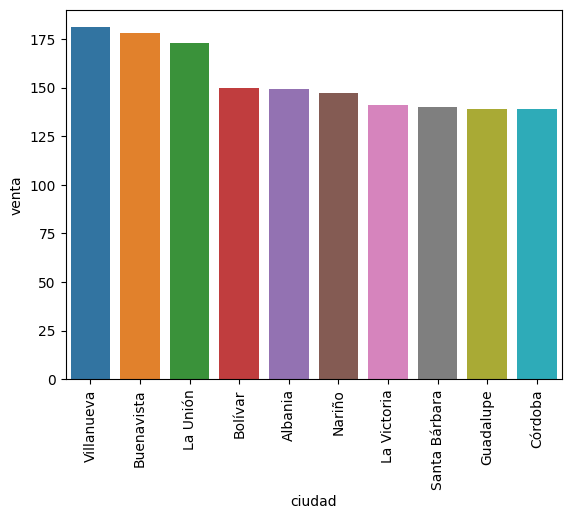

In [ ]:
ventas_ciudad= ventas.groupby(["ciudad"])["venta"].sum()
ventas_ciudad.sort_values(ascending=False, inplace=True)
ventas_ciudad = ventas_ciudad[0:10].reset_index()
ax = sns.barplot(y="venta", x="ciudad", data=ventas_ciudad, order=ventas_ciudad.sort_values('venta', ascending=False)["ciudad"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
#producto más popular en cada ciudad

ventas_ciudad_item = ventas.groupby(["ciudad","id_producto"])["venta"].sum().reset_index()

for ciudad in ventas_ciudad_item.ciudad.unique():
    agg_ventas_ciudad = ventas_ciudad_item.loc[ventas_ciudad_item["ciudad"] == ciudad]
    item_ciudad_sort = agg_ventas_ciudad.sort_values(["venta"], ascending=False)
    print(item_ciudad_sort.max())

ciudad         Abejorral
id_producto           89
venta                  3
dtype: object
ciudad         Abriaquí
id_producto          88
venta                 4
dtype: object
ciudad         Acacías
id_producto         89
venta                3
dtype: object
ciudad         Acandí
id_producto        89
venta               2
dtype: object
ciudad         Acevedo
id_producto         89
venta                2
dtype: object
ciudad         Achí
id_producto      87
venta             3
dtype: object
ciudad         Agrado
id_producto        88
venta               4
dtype: object
ciudad         Agua de Dios
id_producto              89
venta                     2
dtype: object
ciudad         Aguachica
id_producto           87
venta                  5
dtype: object
ciudad         Aguada
id_producto        89
venta               3
dtype: object
ciudad         Aguadas
id_producto         89
venta                2
dtype: object
ciudad         Aguazul
id_producto         89
venta                3
dtype:

Se observa que el producto más popular por ciudad es el producto 89.

In [ ]:
#conteo de la variable tiene_hijos
ventas['tiene_hijos'].value_counts()

1    50117
0    49883
Name: tiene_hijos, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['genero'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

genero,Femenino,Masculino,All
ciudad,,,
Abejorral,0.035,0.052,0.087
Abriaquí,0.047,0.041,0.088
Acacías,0.054,0.046,0.100
Acandí,0.050,0.035,0.085
Acevedo,0.042,0.038,0.080
...,...,...,...
Ábrego,0.051,0.050,0.101
Íquira,0.038,0.037,0.075
Úmbita,0.043,0.045,0.088


Hay un 3,5% de los clientes que son mujeres que son de la ciudad de Abejorral, así mismo, hay un 5,2% de los clientes que son hombres y son de la ciudad de Abejorral.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['genero'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

genero,Femenino,Masculino,All
ciudad,,,
Abejorral,0.035,0.052,0.087
Abriaquí,0.047,0.041,0.088
Acacías,0.054,0.046,0.100
Acandí,0.050,0.035,0.085
Acevedo,0.042,0.038,0.080
...,...,...,...
Ábrego,0.051,0.050,0.101
Íquira,0.038,0.037,0.075
Úmbita,0.043,0.045,0.088


Hay un 4,6% de los clientes que son Femeninas que son de la ciudad de útica y un 4,1% de los clientes Masculinos que viven en la misma ciudad.

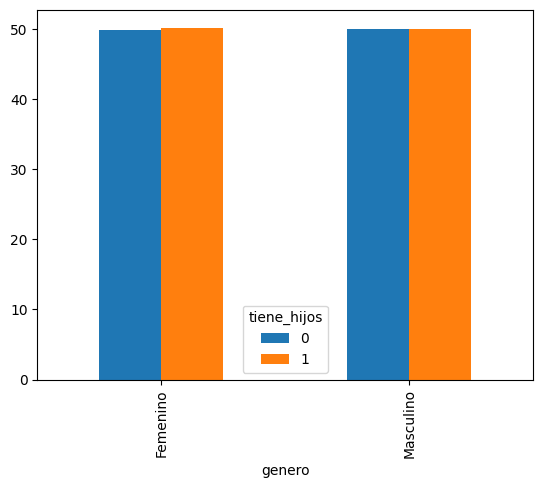

In [ ]:
#Gráfico de barras de genero según si tiene o no hijos
plot= pd.crosstab(index=ventas['genero'], columns= ventas['tiene_hijos']).apply(lambda r :r/r.sum()*100, axis= 1).plot(kind ='bar')

Se puede ver en el gráfico de barras que para los clientes de género femenino son levemente más las que tienen hijos vs las que no tienen hijos y para los clientes de género masculino, es similar la cantidad de clientes que tienen hijos a los que no tienen hijos.


In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
ciudad,,,
Abejorral,0.043,0.044,0.087
Abriaquí,0.039,0.049,0.088
Acacías,0.044,0.056,0.100
Acandí,0.042,0.043,0.085
Acevedo,0.034,0.046,0.080
...,...,...,...
Ábrego,0.043,0.058,0.101
Íquira,0.045,0.030,0.075
Úmbita,0.044,0.044,0.088


Hay un 4,3% de los clientes que viven en la ciudad de Aberjorral que no realizaron alguna compra, mientras que en la ciudad de Abriaquí el 4,9% de los clientes realizaron alguna compra.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['genero'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
genero,,,
Femenino,24.714,25.097,49.811
Masculino,25.157,25.032,50.189
All,49.871,50.129,100.000


El género masculino realizó el 25,15% de las no ventas de productos, superando el resto de los ítems de la tabla.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['tiene_hijos'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
tiene_hijos,,,
0,24.904,24.979,49.883
1,24.967,25.150,50.117
All,49.871,50.129,100.000


El 25,15% de los clientes que realizó una compra tiene hijos.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['edad'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
edad,,,
17,0.063,0.067,0.130
18,0.659,0.726,1.385
19,0.839,0.780,1.619
20,0.759,0.798,1.557
21,0.828,0.835,1.663
...,...,...,...
78,0.776,0.806,1.582
79,0.780,0.758,1.538
80,0.738,0.746,1.484


<ipython-input-26-bad129a1e3dc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= ventas.corr()


<Axes: >

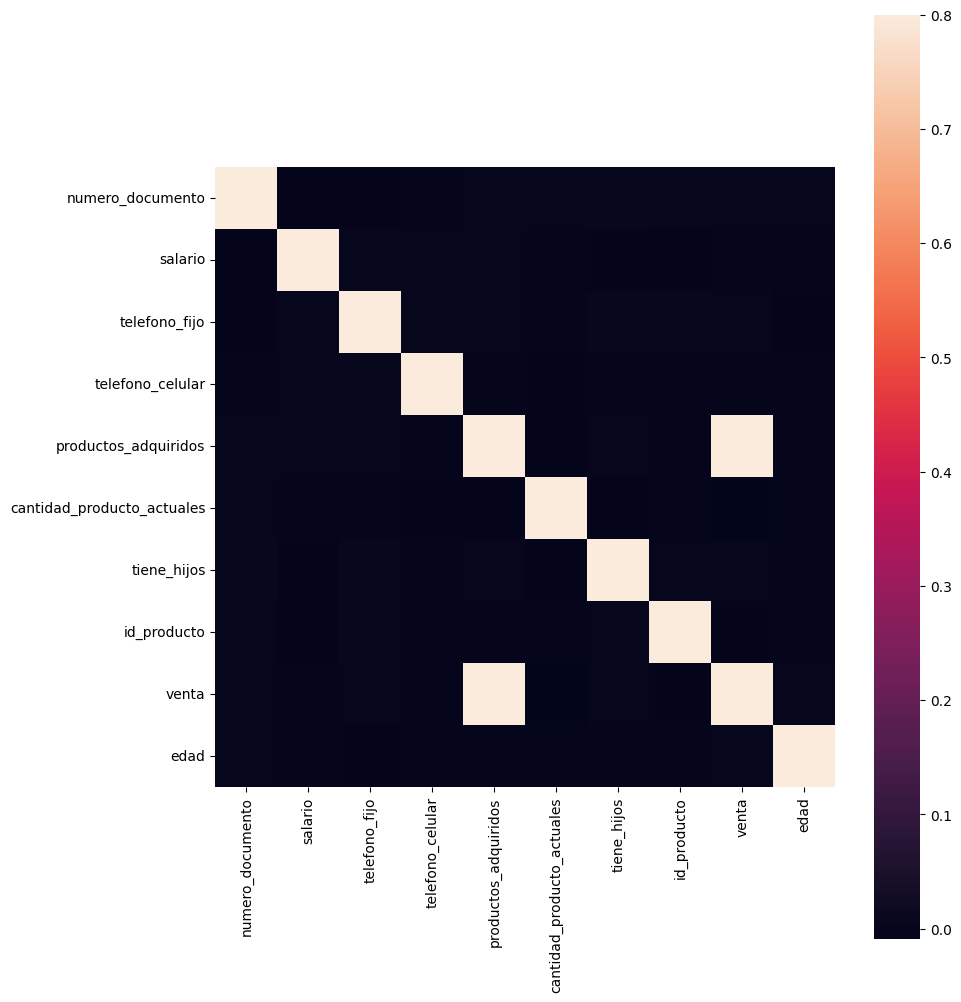

In [ ]:
#Miraremos el comportamiento del dataframe con respecto a todas las variables

corrmat= ventas.corr()
f, ax= plt.subplots(figsize=(10, 12))
sns.heatmap(corrmat, vmax=0.8, square=True)


El mapa de calor de correlación nos indica que únicamente hay correlación lineal entre la variable venta y la varibale productos_adquiridos.
Es decir, que para el resto de las variables hay otros factores que afecten la relación entre esas variables y la venta.
las variables 'telefono_fijo' y 'telefono_celular' no son relevantes en el patrón de compra en este estudio.

En resumen, La ciudad de mayor número de clientes es la ciudad de Villanueva, aunque en nuestra muestra hay mayor número de clientes de género Masculino, los clientes femeninas compran más y compran más los clientes que tienen hijos, adicional, el producto que más se vende por ciudad es el producto 89.

Miraremos mas a fondo la variable 'id_producto'. Para ello, miraremos un conteo de los 10 productos más vendidos, realizaremos un cruce con la base de datos 'df_productos' para establecer estadísticas clave de los productos.

**Análisis de la variable 'id_producto'**

In [ ]:
#Conteo de los 10 primeros productos
ventas['id_producto'].value_counts().head(10)

78    1221
15    1218
71    1206
81    1200
11    1200
36    1194
68    1193
17    1189
8     1184
72    1183
Name: id_producto, dtype: int64

Vamos a unir la base de datos de ventas con la base de datos de producto.Recordemos que la base de datos de ventas comprende información sobre clientes que ya han sido gestionados en otros ciclos campañales y que la base de datos de producto relaciona detalles sobre los diferentes productos disponibles para el consumo de los clientes.


In [ ]:
#Cargando la base de datos de productos

producto= pd.read_csv("/content/df_productos.csv", delimiter=";" , encoding='latin-1')
print(producto.head(10))

   id_producto      nombre     tipo      uso nacionalidad     valor
0            1  Producto A   Básico    Hogar    Importado  12410,41
1            2  Producto B  Premium  Oficina     Nacional  59598,42
2            3  Producto C    Nuevo    Hogar    Importado  46529,85
3            4  Producto D   Básico    Hogar    Importado  36847,89
4            5  Producto E  Premium    Hogar     Nacional   5778,32
5            6  Producto F  Premium  Oficina    Importado      5892
6            7  Producto G    Nuevo    Hogar     Nacional  50385,45
7            8  Producto H  Premium  Oficina     Nacional   50637,8
8            9  Producto I   Básico  Oficina    Importado  85144,12
9           10  Producto J  Premium  Oficina     Nacional  11597,45


In [ ]:
#visualizar el tamaño del dataset
producto.shape

(100, 6)

In [ ]:
producto.dtypes

id_producto      int64
nombre          object
tipo            object
uso             object
nacionalidad    object
valor           object
dtype: object

In [ ]:
#modificando la variable 'valor'
producto['valor']= producto['valor'].str.replace(r"\W","")
print(producto)


    id_producto      nombre     tipo      uso nacionalidad    valor
0             1  Producto A   Básico    Hogar    Importado  1241041
1             2  Producto B  Premium  Oficina     Nacional  5959842
2             3  Producto C    Nuevo    Hogar    Importado  4652985
3             4  Producto D   Básico    Hogar    Importado  3684789
4             5  Producto E  Premium    Hogar     Nacional   577832
..          ...         ...      ...      ...          ...      ...
95           96  Producto R   Básico    Hogar     Nacional   554798
96           97  Producto S  Premium    Hogar     Nacional   671161
97           98  Producto T    Nuevo    Hogar    Importado  6880702
98           99  Producto U    Nuevo    Hogar     Nacional  2014314
99          100  Producto V  Premium    Hogar     Nacional  5603839

[100 rows x 6 columns]


<ipython-input-31-dc8cbe3d0430>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  producto['valor']= producto['valor'].str.replace(r"\W","")


In [ ]:

#modificando la variable 'valor' de object a int
producto['valor']= pd.to_numeric(producto['valor'].astype(int))
producto.dtypes

id_producto      int64
nombre          object
tipo            object
uso             object
nacionalidad    object
valor            int64
dtype: object

In [ ]:
#Conteo de la variable nombre
producto['nombre'].value_counts().sample(10)


Producto F    4
Producto B    4
Producto G    4
Producto H    4
Producto M    4
Producto R    4
Producto L    4
Producto A    4
Producto J    4
Producto W    3
Name: nombre, dtype: int64

In [ ]:
#Conteo para la variable nacionalidad
producto['nacionalidad'].value_counts()

Nacional     53
Importado    47
Name: nacionalidad, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
nombre,,,
Producto A,2.0,2.0,4.0
Producto B,2.0,2.0,4.0
Producto C,1.0,3.0,4.0
Producto D,2.0,2.0,4.0
Producto E,1.0,3.0,4.0
Producto F,3.0,1.0,4.0
Producto G,2.0,2.0,4.0
Producto H,0.0,4.0,4.0
Producto I,2.0,2.0,4.0


Se puede ver que los productos nacionales predominan los nombres de PRODUCTOC, PRODUCTOE, PRODUCTOH ,PRODUCTOQ ,PRODUCTOU ,PRODUCTOV y en productos importados predominan los nombres de PRODUCTOZ, PRODUCTOT, PRODUCTOP, PRODUCTOO, PRODUCTON y PRODUCTOF.

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['uso'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
uso,,,
Hogar,24.0,31.0,55.0
Oficina,23.0,22.0,45.0
All,47.0,53.0,100.0


Hay un 24% de productos que son de nacionalidad importados y de uso para el hogar, hay un 23% de productos que son de nacionalidad importados y de uso para la oficna. Asi mismo,hay un 31% de productos que son de nacionalidad nacional y de uso para el hogar, y hay un 22% de productos de nacionalidad 'nacional' y de uso para la oficina.

In [ ]:
#Conteo para la variable uso
producto['uso'].value_counts().head()

Hogar      55
Oficina    45
Name: uso, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['uso'], columns= producto['tipo'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

tipo,Básico,Nuevo,Premium,All
uso,,,,
Hogar,16.0,18.0,21.0,55.0
Oficina,16.0,12.0,17.0,45.0
All,32.0,30.0,38.0,100.0


Hay un 16% de productos que son de tipo 'básico' que son de uso para el hogar y para la oficina.
Hay un 18% de productos de tipo 'nuevo' que son en su mayoría de uso de hogar y hay un 17% de productos que son de tipo 'premium' que son en su mayoría de uso para la oficina.

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['uso'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

uso,Hogar,Oficina,All
nombre,,,
Producto A,3.0,1.0,4.0
Producto B,2.0,2.0,4.0
Producto C,3.0,1.0,4.0
Producto D,3.0,1.0,4.0
Producto E,3.0,1.0,4.0
Producto F,2.0,2.0,4.0
Producto G,3.0,1.0,4.0
Producto H,2.0,2.0,4.0
Producto I,1.0,3.0,4.0


Los productos que predominan para el Hogar son los nombres de productos PRODUCTOR, PRODUCTOA, PRODUCTOC, PRODUCTOD, PRODUCTOE,G,K T,U.
El producto que predomina para la oficina es el nombre de producto PRODUCTOP.

In [ ]:
#Conteo para la variable tipo
producto['tipo'].value_counts().head()

Premium    38
Básico     32
Nuevo      30
Name: tipo, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['tipo'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

tipo,Básico,Nuevo,Premium,All
nombre,,,,
Producto A,2.0,1.0,1.0,4.0
Producto B,0.0,1.0,3.0,4.0
Producto C,1.0,2.0,1.0,4.0
Producto D,2.0,1.0,1.0,4.0
Producto E,3.0,0.0,1.0,4.0
Producto F,1.0,1.0,2.0,4.0
Producto G,2.0,2.0,0.0,4.0
Producto H,0.0,1.0,3.0,4.0
Producto I,2.0,0.0,2.0,4.0


El producto que es de tipo más básico es el producto PRODUCTOE, el producto que predomina de tipo nuevo es el producto PRODUCTOV, y los productos que son de tipo premium son los productos PRODUCTOB, PRODUCTOH, PRODUCTOL.

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['tipo'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
tipo,,,
Básico,21.0,11.0,32.0
Nuevo,10.0,20.0,30.0
Premium,16.0,22.0,38.0
All,47.0,53.0,100.0


Hay un 21% de los productos de tipo básico con son de nacionalida importados,los productos de tipo 'nuevo' son de nacionalidad nacional en un 20% y los productos premium son de nacionalidad nacional en un 22%.

In [ ]:
#Resumen de estadística descriptiva:
producto.describe()

,id_producto,valor
count,100.000000,1.000000e+02
mean,50.500000,4.553931e+06
std,29.011492,2.909009e+06
min,1.000000,5.892000e+03
25%,25.750000,2.175613e+06
50%,50.500000,4.619498e+06
75%,75.250000,6.681008e+06
max,100.000000,9.800829e+06


Analicemos el 'id_producto' por cada una de las variables de la base de datos de 'producto'


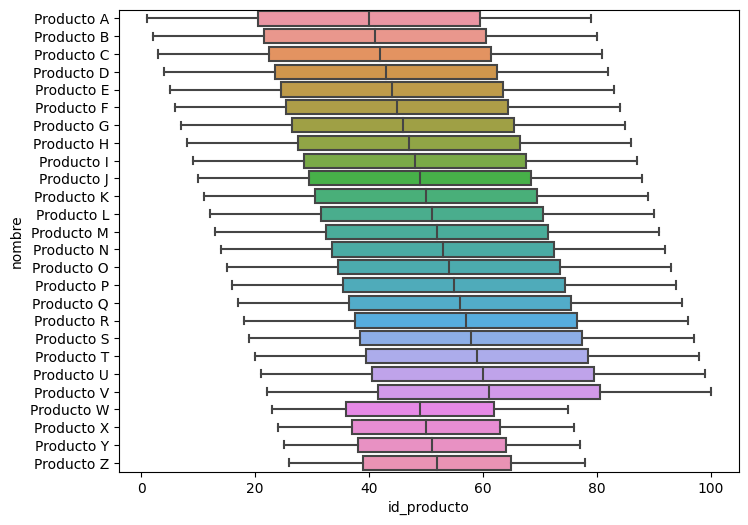

In [ ]:
data = pd.concat([producto['nombre'], producto['id_producto']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="id_producto", y="nombre", data=producto)


Se puede observar que los productos que contienen menos cantidad de id_productos son los 'nombres' PRODUCTOW, PRODUCTOX, PRODUCTOY y PRODUCTOZ, que contienen 3 valores de id_producto cada uno.

In [ ]:
#Uniendo las bases de datos 'ventas' y 'producto' por medio de la variable 'id_producto'

df= pd.merge(ventas, producto, on='id_producto', how='inner')
print(df.head(10))



   numero_documento    salario            ciudad     genero fecha_nacimiento  \
0       53568925215  8340888.0  Puerto Leguízamo  Masculino       1980-05-24   
1       96613195289  4178426.0         Chigorodó   Femenino       1997-11-09   
2       78835380354  8017449.0            La Paz   Femenino       1950-04-28   
3       81751476287  5639694.0          Curumaní  Masculino       1963-08-13   
4       50002915762  8029608.0     Puerto Berrío  Masculino       1943-10-10   
5       94717891063  2448847.0            Timbío   Femenino       1942-08-26   
6       99449628122  7591127.0             Sucre   Femenino       1952-11-11   
7       88813837561  9968410.0         Río Quito   Femenino       1968-09-30   
8       82882909227  9580412.0          Norcasia   Femenino       1966-04-24   
9       70166819402  3167679.0             Chima   Femenino       2003-05-25   

   telefono_fijo  telefono_celular  productos_adquiridos  \
0      264233357        3826820159                     0   

In [ ]:
#verificando el tamaño de la base de datos

df.shape

(100000, 18)

Miremos las ganancias de los productos

In [ ]:
ganancias= round((df['productos_adquiridos']* df['valor']).sum(),2)
print(f"Ganancias totales de ventas : {ganancias}")


Ganancias totales de ventas : 1276557510968


In [ ]:
#Ganancias por producto por año
df['year']= df['fecha_nacimiento'].dt.year
df.head(3)

,numero_documento,salario,ciudad,genero,fecha_nacimiento,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,id_producto,venta,edad,nombre,tipo,uso,nacionalidad,valor,year
0,53568925215,8340888.0,Puerto Leguízamo,Masculino,1980-05-24,264233357,3826820159,0,2,1,17,0,43,Producto Q,Premium,Oficina,Nacional,2476561,1980
1,96613195289,4178426.0,Chigorodó,Femenino,1997-11-09,242680262,3577445778,3,1,1,17,1,25,Producto Q,Premium,Oficina,Nacional,2476561,1997
2,78835380354,8017449.0,La Paz,Femenino,1950-04-28,248253161,3630822484,0,2,1,17,0,73,Producto Q,Premium,Oficina,Nacional,2476561,1950


In [ ]:
#Ganancias por año
df['Revenue']= df['id_producto']* df['valor']
ganancias_year = df[['Revenue','year']].groupby('year').sum().reset_index()
ganancias_year= ganancias_year.sort_values('Revenue', ascending= False)

df_ganancias= pd.DataFrame(ganancias_year)
df_ganancias


,year,Revenue
49,1991,349054544401
60,2002,348523103497
45,1987,347416164335
36,1978,345230925967
29,1971,344897638521
...,...,...
42,1984,311351693570
10,1952,310916460650
21,1963,305300337058
63,2005,207803021347


In [ ]:
print(np.min(df_ganancias))
print(np.max(df_ganancias))

year               1942
Revenue    130116233785
dtype: int64
year               2005
Revenue    349054544401
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
df_ganancias.index = df_ganancias['year']
df_ganancias = df_ganancias.drop('year', axis= 'columns')


In [ ]:
x= df_ganancias.index
y= df_ganancias['Revenue']
y

year
1991    349054544401
2002    348523103497
1987    347416164335
1978    345230925967
1971    344897638521
            ...     
1984    311351693570
1952    310916460650
1963    305300337058
2005    207803021347
1942    130116233785
Name: Revenue, Length: 64, dtype: int64

Text(0.5, 1.0, 'Ganancias por año')

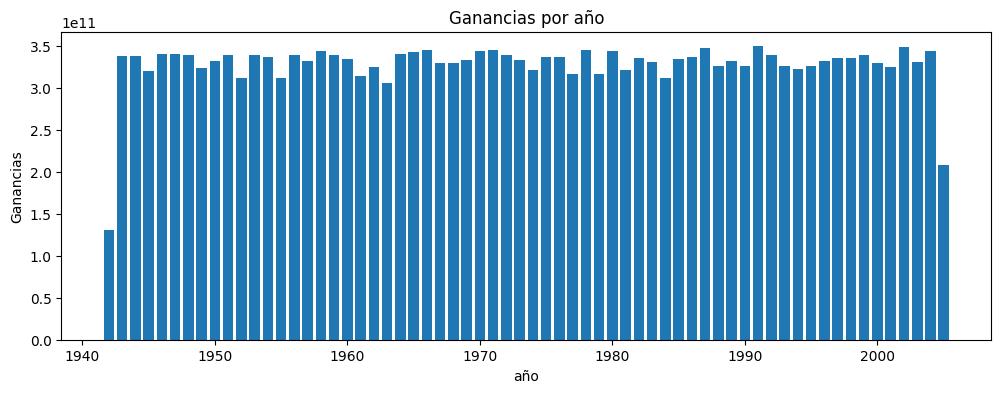

In [ ]:
#Gráfico de barras de ganancia por año
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x, y)
ax.set_xlabel('año')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias por año')

El año con menores ventas fue 1941 con un total de $130.116.2337,85

In [ ]:
#Ganancias de ventas por ciudad
ganancias_ciudad =df[['Revenue','ciudad']].groupby('ciudad').sum().reset_index()
ganancias_ciudad= ganancias_ciudad.sort_values('Revenue', ascending= False)

ganancias_ciudad

,ciudad,Revenue
1001,Villanueva,81317708938
455,La Unión,73188481883
108,Buenavista,71607182017
817,Santa Bárbara,66798205463
359,Guadalupe,58527621217
...,...,...
478,Luruaco,12293495220
321,Francisco Pizarro,12083459469
418,Junín,11919383448
958,Támara,11469322954


La ciudad con mayor número de ventas de productos en la ciudad de Villanueva

In [ ]:
#producto que vendió más
producto_venta= df[['productos_adquiridos','id_producto']].groupby('id_producto').sum().reset_index()
producto_venta = producto_venta.sort_values('productos_adquiridos', ascending= False)
producto_venta

,id_producto,productos_adquiridos
18,20,3480
65,67,3467
66,68,3453
13,15,3448
45,47,3374
...,...,...
2,4,2865
7,9,2843
74,76,2840
82,84,2795


In [ ]:
#tabla de contingencia en porcentajes relativos total
cruce= pd.crosstab(index= df['id_producto'], columns= df['productos_adquiridos'] ,margins =True).apply(lambda r :r/len(df)*100, axis= 1)
cruce

productos_adquiridos,0,1,2,3,4,5,6,7,8,9,10,All
id_producto,,,,,,,,,,,,
2,0.557,0.059,0.061,0.063,0.047,0.043,0.063,0.063,0.055,0.063,0.062,1.136
3,0.525,0.061,0.052,0.065,0.060,0.041,0.056,0.066,0.059,0.060,0.058,1.103
4,0.552,0.052,0.059,0.056,0.056,0.045,0.052,0.052,0.054,0.050,0.052,1.080
5,0.591,0.069,0.062,0.058,0.068,0.059,0.049,0.049,0.068,0.054,0.053,1.180
6,0.565,0.066,0.066,0.057,0.060,0.065,0.057,0.067,0.056,0.055,0.048,1.162
...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.541,0.045,0.059,0.063,0.061,0.065,0.052,0.046,0.050,0.059,0.065,1.106
87,0.556,0.060,0.059,0.075,0.060,0.064,0.049,0.061,0.053,0.047,0.060,1.144
88,0.560,0.060,0.059,0.060,0.046,0.048,0.061,0.051,0.060,0.047,0.060,1.112


In [ ]:
cruce.max()

productos_adquiridos
0       49.871
1        5.040
2        5.027
3        5.046
4        4.881
5        5.105
6        4.996
7        5.075
8        5.048
9        4.872
10       5.039
All    100.000
dtype: float64

Hay un porcentaje mayor de que ningun producto fue adquirido por algún cliente.

Como se había visto en el anális anterior de la tabla de ventas, el producto que vendió más por ciudad fue el 89. Repite el producto 89 como el más adquirido por los clientes en una cantidad de 7 unidades.
El nombre del producto es PRODUCTOK y es un producto tipo premium, con uso de hogar y es producto nacional.

Ahora vamos a tener presente el 'id_producto' 89 como objetivo de evaluación de comentarios del producto, para ello, cargamos la base de datos encuentas.csv para tener una idea más amplia de la satisfacción del cliente por el producto.

**Satisfacción por producto**

In [ ]:
#cargando base de datos encuestas

encuentas= pd.read_csv('/content/encuestas.csv', delimiter=";", encoding='latin-1')
print(encuentas.head(10))

   id_producto        ciudad  calificacion  \
0           52   Pensilvania            10   
1           83      Filandia             1   
2           15      Buriticá            10   
3           54     Arboledas             1   
4            4  Ventaquemada             2   
5           17        Suesca             7   
6           43     Tierralta             8   
7            3        Rivera             1   
8           28   Providencia             4   
9           51        Caloto             8   

                                comentarios  
0                          No lo recomiendo  
1               No cumplió mis expectativas  
2              No está en el tamaño deseado  
3              No está en el tamaño deseado  
4                  Me encanta este producto  
5                  Me encanta este producto  
6                            Es muy costoso  
7  Tiene una buena relación costo beneficio  
8                  Me encanta este producto  
9                   Buena calidad

In [ ]:
encuentas.dtypes

id_producto      int64
ciudad          object
calificacion     int64
comentarios     object
dtype: object

In [ ]:
#Haremos cruce de variables para entender un poco la base de datos encuentas
pd.crosstab(index= encuentas['id_producto'], columns= encuentas['ciudad'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)

ciudad,Abriaquí,Acandí,Acevedo,Agua de Dios,Aguada,Aguadas,Aguazul,Agustín Codazzi,Aipe,Albania,...,Zambrano,Zapatoca,Zarzal,Zetaquira,Zipacón,Ábrego,Íquira,Úmbita,Útica,All
id_producto,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.2


In [ ]:
pd.crosstab(index= encuentas['id_producto'], columns= encuentas['calificacion'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)

calificacion,1,2,3,4,5,6,7,8,9,10,All
id_producto,,,,,,,,,,,
2,0.1,0.2,0.1,0.0,0.1,0.1,0.0,0.0,0.4,0.0,1.0
3,0.2,0.2,0.0,0.1,0.1,0.1,0.2,0.1,0.1,0.1,1.2
4,0.3,0.4,0.0,0.0,0.1,0.1,0.2,0.2,0.1,0.0,1.4
5,0.2,0.0,0.0,0.0,0.2,0.3,0.0,0.3,0.2,0.0,1.2
6,0.0,0.3,0.1,0.0,0.2,0.1,0.1,0.3,0.3,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...
86,0.1,0.2,0.3,0.3,0.3,0.1,0.2,0.1,0.1,0.2,1.9
87,0.2,0.1,0.2,0.0,0.1,0.0,0.0,0.2,0.0,0.1,0.9
88,0.2,0.1,0.1,0.1,0.1,0.2,0.0,0.0,0.0,0.4,1.2


El producto 89 obtuvo una calificación de 1 en condición de insastisfacción por el cliente en un 30% de las encuentas

In [ ]:
cc=pd.crosstab(index= encuentas['ciudad'], columns= encuentas['calificacion'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)
cc

calificacion,1,2,3,4,5,6,7,8,9,10,All
ciudad,,,,,,,,,,,
Abriaquí,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1
Acandí,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1
Acevedo,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2
Agua de Dios,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
Aguada,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...
Ábrego,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1
Íquira,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
Úmbita,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1


In [ ]:
#variable 'ciudad'
duplicados= encuentas['ciudad'].duplicated()

if duplicados.any():
  print(f"Hay valores duplicados.")
else:
  print(f"No hay valores duplicados")

#variable 'id_producto'
duplicados1= encuentas['id_producto'].duplicated()

if duplicados1.any():
  print(f"Hay duplicados.")
else:
  print(f"No hay duplicados")


Hay valores duplicados.
Hay duplicados.


In [ ]:
#Eliminando duplicados en la variable 'ciudad' y la variable 'id_producto'
sin_duplicados= encuentas.drop_duplicates(subset=['ciudad'])

sin_duplicados1= encuentas.drop_duplicates(subset=['id_producto'])


In [ ]:
nueva_encuestas= encuentas[encuentas['ciudad'].isin(sin_duplicados['ciudad'])]

In [ ]:
nuevo_df= nueva_encuestas[nueva_encuestas['id_producto'].isin(sin_duplicados1['id_producto'])]
print(nuevo_df.sample(10))

     id_producto                ciudad  calificacion  \
27            71             El Águila             6   
598           66              Planadas             8   
336           62              Almaguer             1   
575           28              Salamina             8   
460           10               Sasaima             2   
658           87  El Carmen de Viboral             2   
351           24               Cáchira            10   
584           65        Ciénaga de Oro             4   
746           20               Regidor             7   
916           78             Viracachá             8   

                                  comentarios  
27                         Excelente producto  
598                   Buena calidad pero caro  
336                            Es muy costoso  
575              No está en el tamaño deseado  
460                     Tiene un precio justo  
658                          No lo recomiendo  
351                  Me encanta este producto  

In [ ]:
nuevo_df.shape

(1000, 4)

In [ ]:
#integrando la base de datos encuentas a la base de datos de base de ventas y base de producto
df2= pd.merge(df, nuevo_df, on=['id_producto', 'ciudad'], how='inner')
print(df2.sample(10))

      numero_documento    salario             ciudad     genero  \
1071       84085834080  5210325.0  Altos del Rosario   Femenino   
469        40408808841  3004505.0         Valparaíso   Femenino   
449        57016039963  8695685.0            Armenia  Masculino   
401        55273065016  2314766.0          Aquitania  Masculino   
978        11677299352  6663669.0         San Miguel   Femenino   
139         9047010470  4731987.0   Carmen de Carupa  Masculino   
834         4013473149  8000817.0            Duitama  Masculino   
629        17003028349  5057907.0            Giraldo  Masculino   
876        94182558100  8458607.0       La Argentina   Femenino   
382        89375648590  5600753.0         San Carlos   Femenino   

     fecha_nacimiento  telefono_fijo  telefono_celular  productos_adquiridos  \
1071       1973-08-29      215039168        3541978619                     0   
469        2004-03-12      285410303        3171210280                     0   
449        1959-09-23 

In [ ]:
df2.shape

(1175, 22)

In [ ]:
df.shape

(100000, 20)

**Presentando un modelo**

La clase que queremos predecir tiene valores en texto, y aunque algunos modelos de ML lo permiten, generalmente lo ideal es convertir todas las variables a valores numéricos para aprovechar la computación vectorizada de NumPy. Así que debajo convertimos rápidamente los valores de las variables categóricas en números.

In [ ]:
df2['genero'].unique()



array(['Masculino', 'Femenino'], dtype=object)

In [ ]:
map_target_genero = {'Masculino': 0, 'Femenino': 1}

df2['generos'] = df2['genero'].map(map_target_genero)
df2['generos'] = df2['genero'].map(map_target_genero)

df2.head(2)

,numero_documento,salario,ciudad,genero,fecha_nacimiento,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,...,nombre,tipo,uso,nacionalidad,valor,year,Revenue,calificacion,comentarios,generos
0,25110462974,6620542.0,Tauramena,Masculino,1945-11-08,291574877,3346353218,9,4,0,...,Producto Q,Premium,Oficina,Nacional,2476561,1945,42101537,9,Excelente producto,0
1,43069470590,4534850.0,Tauramena,Femenino,2001-01-15,224159661,3446754764,0,3,1,...,Producto Q,Premium,Oficina,Nacional,2476561,2001,42101537,9,Excelente producto,1


In [ ]:
df2['tipo'].unique()

array(['Premium', 'Básico', 'Nuevo'], dtype=object)

In [ ]:
map_target_tipo = {'Premium': 0, 'Básico': 1, 'Nuevo':2}

df2['tipos'] = df2['tipo'].map(map_target_tipo)
df2['tipos'] = df2['tipo'].map(map_target_tipo)

df2.head(2)

,numero_documento,salario,ciudad,genero,fecha_nacimiento,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,...,tipo,uso,nacionalidad,valor,year,Revenue,calificacion,comentarios,generos,tipos
0,25110462974,6620542.0,Tauramena,Masculino,1945-11-08,291574877,3346353218,9,4,0,...,Premium,Oficina,Nacional,2476561,1945,42101537,9,Excelente producto,0,0
1,43069470590,4534850.0,Tauramena,Femenino,2001-01-15,224159661,3446754764,0,3,1,...,Premium,Oficina,Nacional,2476561,2001,42101537,9,Excelente producto,1,0


In [ ]:
df2['uso'].unique()

array(['Oficina', 'Hogar'], dtype=object)

In [ ]:
map_target_uso = {'Oficina': 0, 'Hogar': 1}

df2['usos'] = df2['uso'].map(map_target_uso)
df2['usos'] = df2['uso'].map(map_target_uso)

df2.head(2)

,numero_documento,salario,ciudad,genero,fecha_nacimiento,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,...,uso,nacionalidad,valor,year,Revenue,calificacion,comentarios,generos,tipos,usos
0,25110462974,6620542.0,Tauramena,Masculino,1945-11-08,291574877,3346353218,9,4,0,...,Oficina,Nacional,2476561,1945,42101537,9,Excelente producto,0,0,0
1,43069470590,4534850.0,Tauramena,Femenino,2001-01-15,224159661,3446754764,0,3,1,...,Oficina,Nacional,2476561,2001,42101537,9,Excelente producto,1,0,0


In [ ]:
df2['nacionalidad'].unique()

array(['Nacional', 'Importado'], dtype=object)

In [ ]:
map_target_nal = {'Nacional': 0, 'Importado': 1}

df2['nal'] = df2['nacionalidad'].map(map_target_nal)
df2['nal'] = df2['nacionalidad'].map(map_target_nal)

df2.head(2)

,numero_documento,salario,ciudad,genero,fecha_nacimiento,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,...,nacionalidad,valor,year,Revenue,calificacion,comentarios,generos,tipos,usos,nal
0,25110462974,6620542.0,Tauramena,Masculino,1945-11-08,291574877,3346353218,9,4,0,...,Nacional,2476561,1945,42101537,9,Excelente producto,0,0,0,0
1,43069470590,4534850.0,Tauramena,Femenino,2001-01-15,224159661,3446754764,0,3,1,...,Nacional,2476561,2001,42101537,9,Excelente producto,1,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#selescción de variables
new_data= df2.drop(['ciudad','nombre','comentarios', 'genero', 'fecha_nacimiento', 'tipo', 'nacionalidad','uso'], axis=1)
print(new_data.head(5))

   numero_documento    salario  telefono_fijo  telefono_celular  \
0       25110462974  6620542.0      291574877        3346353218   
1       43069470590  4534850.0      224159661        3446754764   
2       31985081427  7672936.0      275463873        3508534887   
3       29127051535  7493717.0      216879152        3427453359   
4       58403817619  2781675.0      295999875        3770210989   

   productos_adquiridos  cantidad_producto_actuales  tiene_hijos  id_producto  \
0                     9                           4            0           17   
1                     0                           3            1           17   
2                     5                           4            1           17   
3                     1                           1            0           17   
4                     0                           4            0           17   

   venta  edad    valor  year   Revenue  calificacion  generos  tipos  usos  \
0      1    77  2476561  1945  

In [ ]:
new_data.dtypes

numero_documento                int64
salario                       float64
telefono_fijo                   int64
telefono_celular                int64
productos_adquiridos            int64
cantidad_producto_actuales      int64
tiene_hijos                     int64
id_producto                     int64
venta                           int64
edad                            int64
valor                           int64
year                            int64
Revenue                         int64
calificacion                    int64
generos                         int64
tipos                           int64
usos                            int64
nal                             int64
dtype: object

**Modelamiento**

In [ ]:
#Usaremos el modelo de Gradient Boosting para predecir el numero de productos vendidos.
train_set = new_data.loc[new_data["venta"] == 0]
x_train = train_set.drop('id_producto', axis=1)
y_train = train_set['id_producto']

val_set = new_data.loc[new_data["venta"] == 1]
x_val = val_set.drop('id_producto', axis=1)
y_val = val_set['id_producto']

test_set = new_data.loc[new_data["venta"] == 1]
x_test = test_set.drop('id_producto', axis=1)
y_test = test_set['id_producto']

del train_set
del val_set
del test_set

In [ ]:
from sklearn.preprocessing import LabelEncoder

from itertools import product
from xgboost import XGBRegressor
from xgboost import plot_importance

model = XGBRegressor(max_depth=10, n_estimators=1000, min_child_weight=100,
                     colsample_bytree=0.8, subsample=1, eta=0.2)

model.fit(x_train, y_train, eval_metric="rmse",
          eval_set=[(x_train, y_train), (x_val, y_val)],
          verbose=True,
          early_stopping_rounds = 20)

[0]	validation_0-rmse:43.71906	validation_1-rmse:43.40454
[1]	validation_0-rmse:36.67226	validation_1-rmse:36.45785
[2]	validation_0-rmse:31.29453	validation_1-rmse:31.20451
[3]	validation_0-rmse:26.85956	validation_1-rmse:26.96671
[4]	validation_0-rmse:23.50866	validation_1-rmse:23.63154
[5]	validation_0-rmse:21.17045	validation_1-rmse:21.48127
[6]	validation_0-rmse:18.81493	validation_1-rmse:19.21889
[7]	validation_0-rmse:17.07094	validation_1-rmse:17.53930
[8]	validation_0-rmse:16.11361	validation_1-rmse:16.63428
[9]	validation_0-rmse:15.07974	validation_1-rmse:15.64594
[10]	validation_0-rmse:13.96291	validation_1-rmse:14.59139
[11]	validation_0-rmse:13.29611	validation_1-rmse:13.87319
[12]	validation_0-rmse:12.89782	validation_1-rmse:13.57044
[13]	validation_0-rmse:12.30457	validation_1-rmse:12.97117
[14]	validation_0-rmse:12.04274	validation_1-rmse:12.77899
[15]	validation_0-rmse:11.66489	validation_1-rmse:12.40725
[16]	validation_0-rmse:11.48910	validation_1-rmse:12.21140
[17]	va

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:8.56182	validation_1-rmse:9.32739
[49]	validation_0-rmse:8.50129	validation_1-rmse:9.25585
[50]	validation_0-rmse:8.47553	validation_1-rmse:9.21784
[51]	validation_0-rmse:8.43118	validation_1-rmse:9.18955
[52]	validation_0-rmse:8.40071	validation_1-rmse:9.17313
[53]	validation_0-rmse:8.35611	validation_1-rmse:9.09819
[54]	validation_0-rmse:8.32296	validation_1-rmse:9.06126
[55]	validation_0-rmse:8.29101	validation_1-rmse:9.01207
[56]	validation_0-rmse:8.26783	validation_1-rmse:8.97473
[57]	validation_0-rmse:8.23837	validation_1-rmse:8.93191
[58]	validation_0-rmse:8.21009	validation_1-rmse:8.92343
[59]	validation_0-rmse:8.17488	validation_1-rmse:8.89500
[60]	validation_0-rmse:8.13797	validation_1-rmse:8.85821
[61]	validation_0-rmse:8.10649	validation_1-rmse:8.84317
[62]	validation_0-rmse:8.04303	validation_1-rmse:8.82653
[63]	validation_0-rmse:8.01308	validation_1-rmse:8.78380
[64]	validation_0-rmse:7.96642	validation_1-rmse:8.73844
[65]	validation_0-rmse:7.94165	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=100, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
nueva= pd.read_csv('/content/nueva_base.csv', delimiter=";", encoding='latin-1')
print(nueva.head(5))

   numero_documento             salario    ciudad     genero fecha_nacimiento  \
0       20787654836   2141615,637509649  Zapatoca   Femenino       2001-06-01   
1       90871008461  4946615,9011400435     Prado  Masculino       1954-02-22   
2       68088388625   4973504,571622999   Cabrera  Masculino       1981-08-29   
3       31867462076   3491683,373925061     Viotá   Femenino       1949-05-04   
4        8387633603   8654494,940842852   Gigante  Masculino       1988-12-18   

   telefono_fijo  telefono_celular  cantidad_producto_actuales  tiene_hijos  
0      236645294        3429990571                           5            0  
1      213005188        3374409783                           2            1  
2      222969111        3405548926                           4            0  
3      255768648        3533159002                           4            1  
4      282623570        3622734114                           1            0  


In [ ]:
# Se usa el modelo para predecir el número de ventas
y_test = model.predict(x_test).clip(0, 20)

final = pd.DataFrame({"id_producto": nueva['numero_documento'].index, "venta": y_test})

final.to_csv('bd_test_evaluate.csv', index=False)